<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/1d_nf_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import torch.distributions as dist
import  matplotlib.pyplot as plt
import numpy as np
import torch

In [84]:
p_z = dist.Normal(0, 1)
z = p_z.sample((100,))

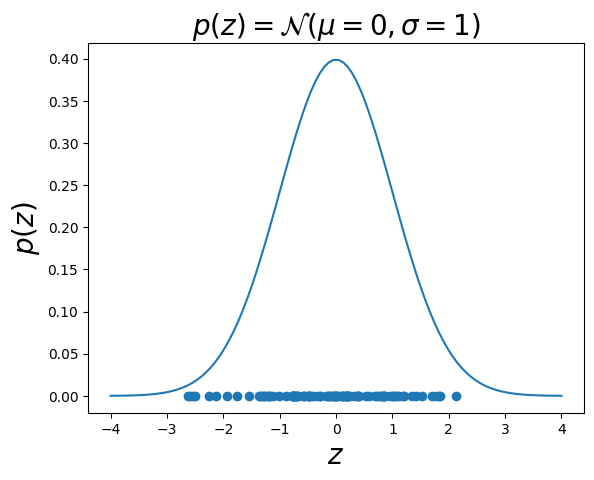

In [85]:
plt.scatter(z, [0 for i in range(len(z))])
plt.plot(torch.linspace(-4,4,100) , p_z.log_prob(torch.linspace(-4,4,100)).exp())


plt.xlabel("$z$", fontsize=20)
plt.ylabel("$p(z)$", fontsize=20)
plt.title("$p(z)=\mathcal{N}(\mu = 0, \sigma=1)$", fontsize=20)
plt.show()

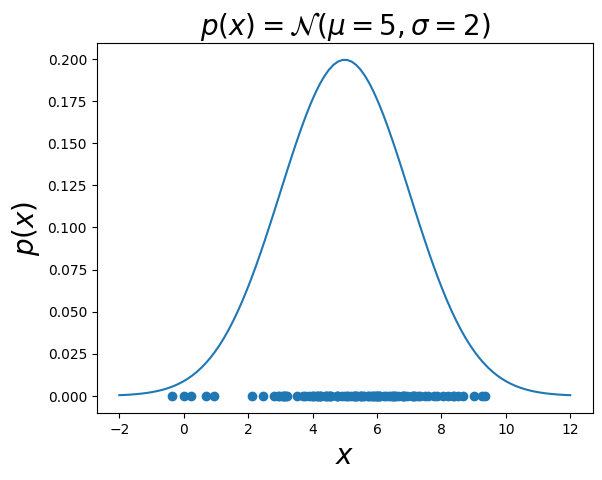

In [86]:
p_x = dist.Normal(5, 2)
x = p_x.sample((100,))

plt.scatter(x, [0 for i in range(len(x))])
plt.plot(torch.linspace(-2,12,100) , p_x.log_prob(torch.linspace(-2,12,100)).exp())


plt.xlabel("$x$", fontsize=20)
plt.ylabel("$p(x)$", fontsize=20)
plt.title("$p(x)=\mathcal{N}(\mu = 5, \sigma=2)$", fontsize=20)
plt.show()

Text(0, 0.5, '${\\theta}(x)$')

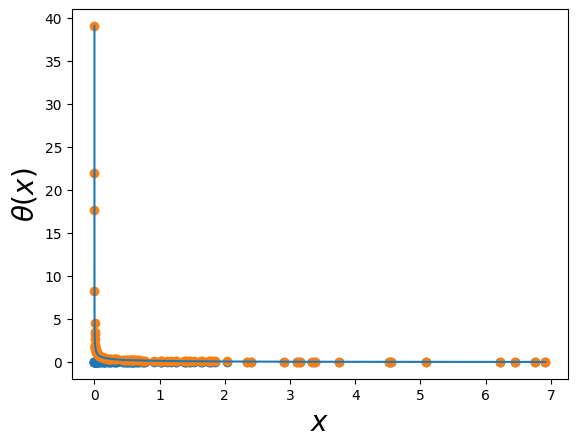

In [87]:
x = z**2

plt.scatter(x, [0 for i in range(len(x))])

p_theta_x = p_z.log_prob(z).exp() * torch.abs(1/(2 * z))

plt.scatter(x, p_theta_x)
plt.plot(torch.sort(x)[0], p_theta_x[torch.sort(x)[1]])


plt.xlabel("$x$", fontsize=20)
plt.ylabel("${\\theta}(x)$", fontsize=20)

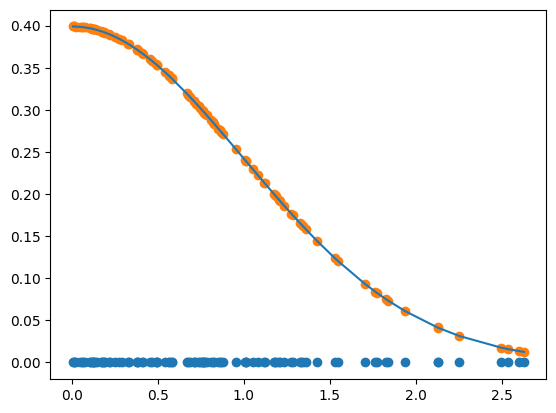

In [88]:
p_z_hat = p_theta_x * torch.abs(2 * torch.sqrt(x))

plt.scatter(torch.sqrt(x), [0 for i in range(len(p_z_hat))])
plt.plot(torch.sort(torch.sqrt(x))[0], p_z_hat[torch.sort(torch.sqrt(x))[1]])
plt.scatter(torch.sort(torch.sqrt(x))[0], p_z_hat[torch.sort(torch.sqrt(x))[1]])

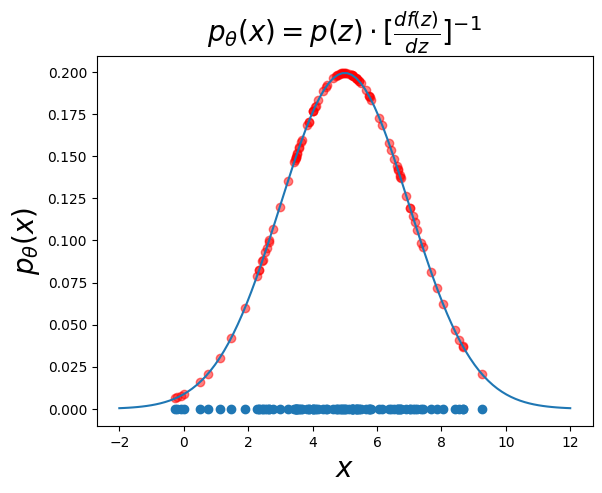

In [103]:
x = 2 * z + 5                                    # x = f(z) = 2 * z + 5

plt.scatter(x, [0 for i in range(len(x))])

p_theta_x = p_z.log_prob(z).exp() * (1/2)
plt.plot(torch.linspace(-2,12,100) , p_x.log_prob(torch.linspace(-2,12,100)).exp())
#plt.scatter(x, p_theta_x)
plt.scatter(torch.sort(x)[0], p_theta_x[torch.sort(x)[1]], color='red', marker='o', alpha=0.5)


plt.xlabel("$x$", fontsize=20)
plt.ylabel("$p_{\\theta}(x)$", fontsize=20)
plt.title("$p_{\\theta}(x)=p(z)\cdot [\\frac{df(z)}{dz}]^{-1}$", fontsize=20)
plt.show()

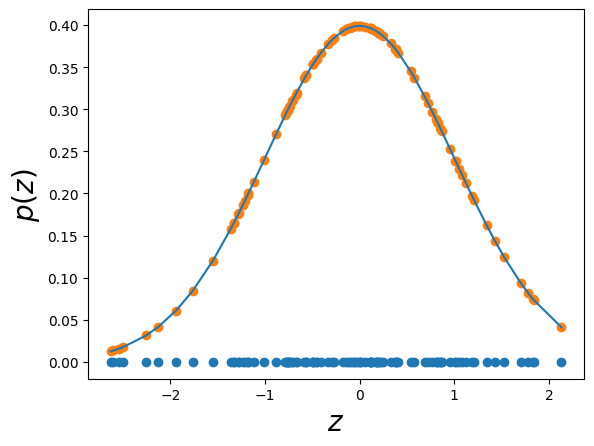

In [90]:
z = (x-5)/2                                   # z = f^-1(x) = (x-5)/2

plt.scatter(z, [0 for i in range(len(z))])

p_z_hat = p_theta_x * 2
plt.scatter(z, p_z_hat)
plt.plot(torch.sort(z)[0], p_z_hat[torch.sort(z)[1]])


plt.xlabel("$z$", fontsize=20)
plt.ylabel("$p(z)$", fontsize=20)
plt.show()